In [1]:
# The C2QA package is currently not published to PyPI.
# To use the package locally, add the C2QA repository's root folder to the path prior to importing c2qa.
import os
import sys
module_path = os.path.abspath(os.path.join("../.."))
if module_path not in sys.path:
    sys.path.append(module_path)

# Cheat to get MS Visual Studio Code Jupyter server to recognize Python venv
module_path = os.path.abspath(os.path.join("../../venv/Lib/site-packages"))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import c2qa
import qiskit
import numpy as np
import scipy
import itertools
import c2qa.util as util
import c2qa.stateReadout as stateReadout
import matplotlib.pyplot as plt
import matplotlib
# Import Qiskit
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi
from qiskit.providers.aer import AerSimulator
from qiskit import IBMQ
from collections import Counter

# Checking Hadamard test for Gauss's law

## Checking Hadamard gate and measurement for 1 mode + qubits

##### 1 mode + 1 test qubit: Test position of qubits FOR GATES AND COUNT READOUT
Counts(ideal): {'test qubit, mode qubit 1, mode qubit 2,    classical bit': 1024}

In [7]:
numberofqubits=0+1 # the extra one is for the Hadamard test
numberofmodes=1
numberofqubitspermode=2
cutoff=2**numberofqubitspermode

qmr = c2qa.QumodeRegister(num_qumodes=numberofmodes, num_qubits_per_qumode=numberofqubitspermode)
qbr = qiskit.QuantumRegister(size=numberofqubits)
cbr = qiskit.ClassicalRegister(size=1) # To read out the results of the Hadamard test
circuit = c2qa.CVCircuit(qmr, qbr, cbr)

# circuit.cv_initialize(1, qmr[0])
circuit.x(qbr[0])

circuit.measure_all()
circuit.cv_measure(qmr[3])
circuit.cv_measure(qbr[4])

stateop, result = c2qa.util.simulate(circuit)
util.stateread(stateop, qbr.size, numberofmodes, 4)
print('Counts(ideal):', result.get_counts())

qumodes:  0  qubits:  1     with amplitude:  1.0
occupation modes  [0.0]
occupation qubits  [1.0]
Counts(ideal): {'100 0': 1024}


##### 1 mode + 1 test qubit: Test position of qubits FOR MEASUREMENT
Counts(ideal): {'test qubit, mode qubit 1, mode qubit 2,    classical bit': 1024}
measure takes the qubits from right to left
measure(0,0): mode qubit 2
measure(1,0): mode qubit 1
measure(2,0): test qubit

In [8]:
numberofqubits=0+1 # the extra one is for the Hadamard test
numberofmodes=1
numberofqubitspermode=2
cutoff=2**numberofqubitspermode

qmr = c2qa.QumodeRegister(num_qumodes=numberofmodes, num_qubits_per_qumode=numberofqubitspermode)
qbr = qiskit.QuantumRegister(size=numberofqubits)
cbr = qiskit.ClassicalRegister(size=1) # To read out the results of the Hadamard test
circuit = c2qa.CVCircuit(qmr, qbr, cbr)

# circuit.cv_initialize(1, qmr[0])
circuit.x(qbr[0])

circuit.measure(2,0)
# circuit.measure_all()

stateop, result = c2qa.util.simulate(circuit)
util.stateread(stateop, qbr.size, numberofmodes, 4)
print('Counts(ideal):', result.get_counts())

qumodes:  0  qubits:  1     with amplitude:  1.0
occupation modes  [0.0]
occupation qubits  [1.0]
Counts(ideal): {'1': 1024}


##### 1 mode + 1 test qubit (no classical bits): Hadamard gate

In [9]:
qmr = c2qa.QumodeRegister(num_qumodes=1, num_qubits_per_qumode=2)
qbr = qiskit.QuantumRegister(size=1)
circuit = c2qa.CVCircuit(qmr, qbr)

circuit.h(qbr[0])

stateop, result = c2qa.util.simulate(circuit)
util.stateread(stateop, qbr.size, numberofmodes, 4)
print('Counts(ideal):', result.get_counts())

circuit.measure_all()
# Can't measure onto a classical bit because we don't have one

stateop, result = c2qa.util.simulate(circuit)
util.stateread(stateop, qbr.size, numberofmodes, 4)
print('Counts(ideal):', result.get_counts())

qumodes:  0  qubits:  0     with amplitude:  0.7071067811865476
qumodes:  0  qubits:  1     with amplitude:  0.7071067811865475
occupation modes  [0.0]
occupation qubits  [0.4999999999999999]
Counts(ideal): {'000': 0.5, '100': 0.5}
qumodes:  0  qubits:  1     with amplitude:  1.0
occupation modes  [0.0]
occupation qubits  [1.0]
Counts(ideal): {'100': 526, '000': 498}


##### 1 mode + 1 test qubit + 1 classial bit: Hadamard gate and measure

In [10]:
numberofqubits=0+1 # the extra one is for the Hadamard test
numberofmodes=1
numberofqubitspermode=2
cutoff=2**numberofqubitspermode

qmr = c2qa.QumodeRegister(num_qumodes=numberofmodes, num_qubits_per_qumode=numberofqubitspermode)
qbr = qiskit.QuantumRegister(size=numberofqubits)
cbr = qiskit.ClassicalRegister(size=1) # To read out the results of the Hadamard test
circuit = c2qa.CVCircuit(qmr, qbr, cbr)

# circuit.cv_initialize(1, qmr[0])
circuit.h(qbr[0])

circuit.measure(2,0)
# circuit.measure_all()

# When we simulate this circuit we sometimes get 0 and sometimes get 1 because the simulator emulates quantum measurement: if you collapse a perfect superposition you get half the time zero and half the time 1.
stateop, result = c2qa.util.simulate(circuit)
util.stateread(stateop, qbr.size, numberofmodes, 4)
print('Counts(ideal):', result.get_counts())

qumodes:  0  qubits:  1     with amplitude:  1.0
occupation modes  [0.0]
occupation qubits  [1.0]
Counts(ideal): {'1': 494, '0': 530}


##### 1 mode + 1 test qubit + 2 spare qubits which do nothing: Test position of qubits
Test qubit = qbr[0], which is therefore still, with only one mode, read out with measure(2,0)

In [11]:
numberofqubits=2+1 # the extra one is for the Hadamard test
numberofmodes=1
numberofqubitspermode=2
cutoff=2**numberofqubitspermode

qmr = c2qa.QumodeRegister(num_qumodes=numberofmodes, num_qubits_per_qumode=numberofqubitspermode)
qbr = qiskit.QuantumRegister(size=numberofqubits)
cbr = qiskit.ClassicalRegister(size=1) # To read out the results of the Hadamard test
circuit = c2qa.CVCircuit(qmr, qbr, cbr)

circuit.x(qbr[0])
# circuit.cv_initialize(1, qmr[0])

circuit.measure(2,0)
# circuit.measure_all()

stateop, result = c2qa.util.simulate(circuit)
util.stateread(stateop, qbr.size, numberofmodes, 4)
print('Counts(ideal):', result.get_counts())

qumodes:  0  qubits:  001     with amplitude:  1.0
occupation modes  [0.0]
occupation qubits  [0.0, 0.0, 1.0]
Counts(ideal): {'1': 1024}


##### 1 mode + 1 test qubit + 2 spare qubits which do nothing: Hadamard gate & measurement

In [12]:
numberofqubits=2+1 # the extra one is for the Hadamard test
numberofmodes=1
numberofqubitspermode=2
cutoff=2**numberofqubitspermode

qmr = c2qa.QumodeRegister(num_qumodes=numberofmodes, num_qubits_per_qumode=numberofqubitspermode)
qbr = qiskit.QuantumRegister(size=numberofqubits)
cbr = qiskit.ClassicalRegister(size=1) # To read out the results of the Hadamard test
circuit = c2qa.CVCircuit(qmr, qbr, cbr)

circuit.h(qbr[0])

circuit.measure(2,0)

stateop, result = c2qa.util.simulate(circuit)
util.stateread(stateop, qbr.size, numberofmodes, 4)
print('Counts(ideal):', result.get_counts())

qumodes:  0  qubits:  001     with amplitude:  1.0
occupation modes  [0.0]
occupation qubits  [0.0, 0.0, 1.0]
Counts(ideal): {'1': 531, '0': 493}


## Checking Hadamard test for 1 mode + qubits

##### 1 mode + 1 test qubit (no classical bits): Hadamard test

In [16]:
qmr = c2qa.QumodeRegister(num_qumodes=1, num_qubits_per_qumode=2)
qbr = qiskit.QuantumRegister(size=1)
circuit = c2qa.CVCircuit(qmr, qbr)

# Depending on what state you initialise the mode in, the final state of the test qubit changes
circuit.cv_initialize(0, qmr[0])
circuit.h(qbr[0])
circuit.cv_cp(np.pi/2, qmr[0], qbr[0])
circuit.h(qbr[0])

stateop, result = c2qa.util.simulate(circuit)
util.stateread(stateop, qbr.size, 1, 4)
print('Counts(ideal):', result.get_counts())

qumodes:  0  qubits:  0     with amplitude:  1.0
occupation modes  [0.0]
occupation qubits  [0.0]
Counts(ideal): {'000': 1.0}


##### 1 mode + 1 test qubit + 2 spare qubits + 1 classical bit: Hadamard test & measurement

In [18]:
numberofqubits=2+1 # the extra one is for the Hadamard test
numberofmodes=1
numberofqubitspermode=2
cutoff=2**numberofqubitspermode

qmr = c2qa.QumodeRegister(num_qumodes=numberofmodes, num_qubits_per_qumode=numberofqubitspermode)
qbr = qiskit.QuantumRegister(size=numberofqubits)
cbr = qiskit.ClassicalRegister(size=1) # To read out the results of the Hadamard test
circuit = c2qa.CVCircuit(qmr, qbr, cbr)

# Depending on what state you initialise the mode in, the final state of the test qubit changes
diffstallmodes=[1]
# diffstallmodes=[0]
for i in range(qmr.num_qumodes):
    circuit.cv_initialize(diffstallmodes[i], qmr[i])

circuit.h(qbr[0])

circuit.cv_cp(np.pi/2, qmr[0], qbr[0])
circuit.h(qbr[0])
circuit.measure(2,0)

stateop, result = c2qa.util.simulate(circuit)
util.stateread(stateop, qbr.size, numberofmodes, 4)
print('Counts(ideal):', result.get_counts())

qumodes:  1  qubits:  001     with amplitude:  -1.0
occupation modes  [1.0]
occupation qubits  [0.0, 0.0, 1.0]
Counts(ideal): {'1': 1024}


##### 1 mode + 1 test qubit + 2 gauge qubits (|+>) + 1 classical bit: Hadamard test & measurement (same result as above)

/home/richard/anaconda3/envs/c2qa/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/home/richard/anaconda3/envs/c2qa/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:215: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '
/home/richard/anaconda3/envs/c2qa/lib/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


qumodes:  1  qubits:  001     with amplitude:  -0.5000000000000001
qumodes:  1  qubits:  011     with amplitude:  -0.5
qumodes:  1  qubits:  101     with amplitude:  -0.5
qumodes:  1  qubits:  111     with amplitude:  -0.4999999999999999
occupation modes  [1.0]
occupation qubits  [0.4999999999999999, 0.4999999999999999, 1.0]
Counts(ideal): {'1': 1024}


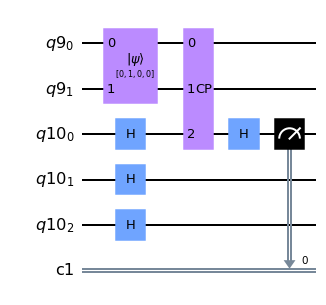

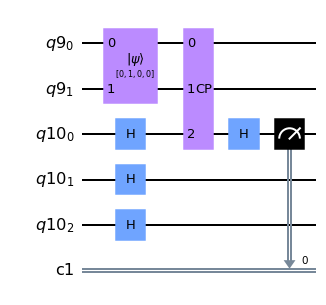

In [4]:
numberofqubits=2+1 # the extra one is for the Hadamard test
numberofmodes=1
numberofqubitspermode=2
cutoff=2**numberofqubitspermode

qmr = c2qa.QumodeRegister(num_qumodes=numberofmodes, num_qubits_per_qumode=numberofqubitspermode)
qbr = qiskit.QuantumRegister(size=numberofqubits)
cbr = qiskit.ClassicalRegister(size=1) # To read out the results of the Hadamard test
circuit = c2qa.CVCircuit(qmr, qbr, cbr)

diffstallmodes=[1]
for i in range(qmr.num_qumodes):
    circuit.cv_initialize(diffstallmodes[i], qmr[i])

# Initialise Hadamard test qubit with hadamard gate. Also put gauge qubits into |+> using Hadamard.
for i in range(0,numberofqubits):
    circuit.h(qbr[i])

circuit.cv_cp(np.pi/2, qmr[0], qbr[0])
circuit.h(qbr[0]) # Hadamard gate on qubit 0
circuit.measure(2,0) # Measure qubit 0 (which

stateop, result = c2qa.util.simulate(circuit)
util.stateread(stateop, qbr.size, numberofmodes, 4)
print('Counts(ideal):', result.get_counts())

circuit.draw(output='mpl', filename='initial-state_hadmard-test.png')

##### 1 mode + 1 test qubit + 2 gauge qubits (|+>) + 1 classical bit: Hadamard test with cnot on gauge qubits & measurement (same result as above)

/home/richard/anaconda3/envs/c2qa/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/home/richard/anaconda3/envs/c2qa/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:215: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '
/home/richard/anaconda3/envs/c2qa/lib/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


qumodes:  1  qubits:  001     with amplitude:  -0.5
qumodes:  1  qubits:  011     with amplitude:  -0.5
qumodes:  1  qubits:  101     with amplitude:  -0.5
qumodes:  1  qubits:  111     with amplitude:  -0.5
occupation modes  [1.0]
occupation qubits  [0.5, 0.5, 1.0]
Counts(ideal): {'1': 1024}


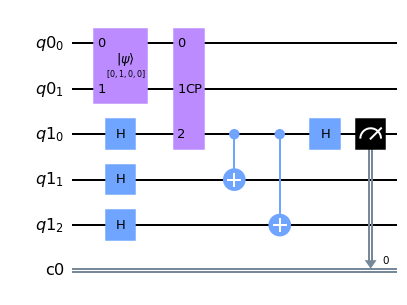

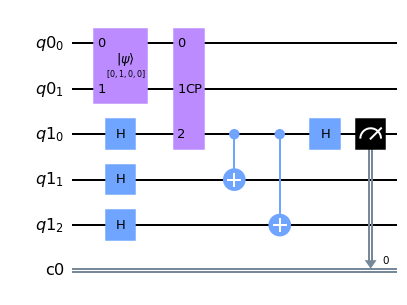

In [3]:
numberofqubits=2+1 # the extra one is for the Hadamard test
numberofmodes=1
numberofqubitspermode=2
cutoff=2**numberofqubitspermode

qmr = c2qa.QumodeRegister(num_qumodes=numberofmodes, num_qubits_per_qumode=numberofqubitspermode)
qbr = qiskit.QuantumRegister(size=numberofqubits)
cbr = qiskit.ClassicalRegister(size=1) # To read out the results of the Hadamard test
circuit = c2qa.CVCircuit(qmr, qbr, cbr)

diffstallmodes=[1]
for i in range(qmr.num_qumodes):
    circuit.cv_initialize(diffstallmodes[i], qmr[i])

# Initialise Hadamard test qubit with hadamard gate. Also put gauge qubits into |+> using Hadamard.
for i in range(0,numberofqubits):
    circuit.h(qbr[i])

circuit.cv_cp(np.pi/2, qmr[0], qbr[0])
circuit.cnot(qbr[0],qbr[1])
circuit.cnot(qbr[0],qbr[2])
circuit.h(qbr[0]) # Hadamard gate on qubit 0
circuit.measure(2,0) # Measure qubit 0 (which

stateop, result = c2qa.util.simulate(circuit)
util.stateread(stateop, qbr.size, numberofmodes, 4)
print('Counts(ideal):', result.get_counts())

circuit.draw(output='mpl', filename='initial-state_hadmard-test.png')

##### 1 mode + 1 test qubit + 2 gauge qubits (|+>) + 1 classical bit: Hadamard test with cnot on gauge qubits & measurement (same result as above). Reordered naming of qubits

/home/richard/anaconda3/envs/c2qa/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/home/richard/anaconda3/envs/c2qa/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:215: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '
/home/richard/anaconda3/envs/c2qa/lib/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


qumodes:  1  qubits:  100     with amplitude:  -0.5
qumodes:  1  qubits:  101     with amplitude:  -0.5
qumodes:  1  qubits:  110     with amplitude:  -0.5
qumodes:  1  qubits:  111     with amplitude:  -0.5
occupation modes  [1.0]
occupation qubits  [1.0, 0.5, 0.5]
Counts(ideal): {'1': 1024}


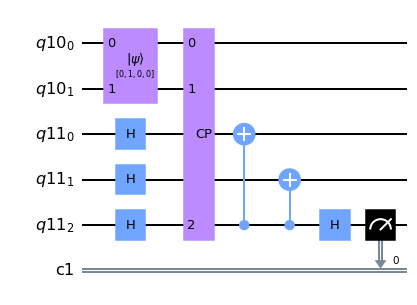

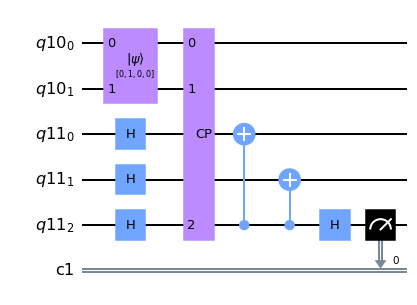

In [4]:
numberofqubits=2+1 # the extra one is for the Hadamard test
numberofmodes=1
numberofqubitspermode=2
cutoff=2**numberofqubitspermode

qmr = c2qa.QumodeRegister(num_qumodes=numberofmodes, num_qubits_per_qumode=numberofqubitspermode)
qbr = qiskit.QuantumRegister(size=numberofqubits)
cbr = qiskit.ClassicalRegister(size=1) # To read out the results of the Hadamard test
circuit = c2qa.CVCircuit(qmr, qbr, cbr)

diffstallmodes=[1]
for i in range(qmr.num_qumodes):
    circuit.cv_initialize(diffstallmodes[i], qmr[i])

# Initialise Hadamard test qubit with hadamard gate. Also put gauge qubits into |+> using Hadamard.
for i in range(0,numberofqubits):
    circuit.h(qbr[i])

circuit.cv_cp(np.pi/2, qmr[0], qbr[-1])
circuit.cnot(qbr[-1],qbr[0])
circuit.cnot(qbr[-1],qbr[1])
circuit.h(qbr[-1]) # Hadamard gate on qubit 0
circuit.measure(-1,0) # Measure qubit 0 (which

stateop, result = c2qa.util.simulate(circuit)
util.stateread(stateop, qbr.size, numberofmodes, 4)
print('Counts(ideal):', result.get_counts())

circuit.draw(output='mpl', filename='initial-state_hadmard-test.png')